In [1]:
import os
import cv2
import torch
import numpy as np

from torch import nn

from tqdm.notebook import tqdm
from collections import defaultdict
from torch.utils.data import Dataset, DataLoader
from transformers import get_scheduler
from transformers import SegformerForSemanticSegmentation
from torchvision import transforms as tf

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from train.loss import dice_coef_loss, tversky_index_loss, TverskyIndexLoss
from datasetPrepare.ImageDataset import ImageDataset, get_img_for_train_and_val, collate_fn
from datasetPrepare.imgPrepare import img_prepare, create_img_transform, get_img_mask
from models.smallModel import SmallSegFormer
from models.wideSegFormer import WideSegFormer, SegformerDecodeHead
from models.finalModel import FinalModel2
from train.learning_loop import learning_loop, show_examples
from train.train_model import create_model_and_optimizer, load_model_and_create_optimizer
%load_ext autoreload
%autoreload 2

In [7]:
def run_model(folder, img_name, model):
    img = cv2.imread(os.path.join(folder, img_name))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    with torch.no_grad():
        res = model(torch.from_numpy(img).short().permute((2, 0, 1))).numpy()
    q = np.zeros(img.shape)
    q[res.astype(bool)] = img[res.astype(bool)]
    fig, axs = plt.subplots(nrows= 1 , ncols= 3, figsize=(15, 15))
    axs[0].imshow(res)
    axs[1].imshow(img)
    axs[2].imshow(q)
    return q

In [4]:
model = FinalModel2()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


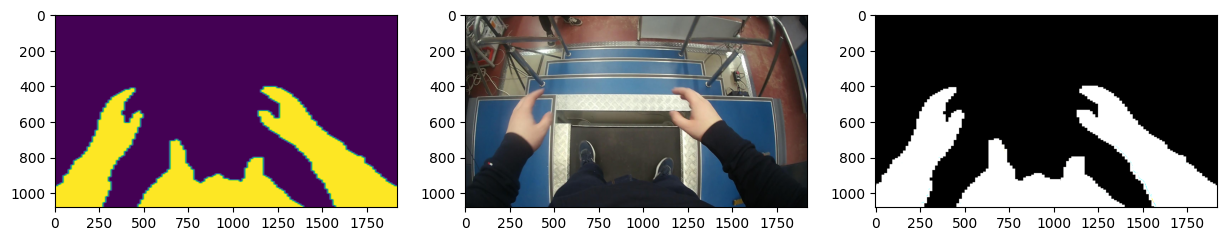

In [8]:
res = run_model(".", "5_X.jpg", model)